In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile, scipy.fft, scipy.signal

%config InlineBackend.figure_format = 'svg'

In [3]:
def gaussian(sigma = 1):
    tail = 3 * int(sigma)
    x = np.arange(-tail, tail + 1)
    return np.exp(-(x/sigma)**2 / 2) / (sigma * np.sqrt(2 * np.pi))

In [4]:
def smooth(data, smoothness = 32):
    return scipy.signal.convolve(data, gaussian(sigma = smoothness), mode = 'same')

In [5]:
def condense(data, window_size):
    padded = np.pad(data, (0, (window_size - len(data) % window_size) % window_size))
    reshaped = padded.reshape((-1, window_size))
    return reshaped.max(axis = 1), reshaped.argmax(axis = 1) + np.arange(0, len(data), window_size)

In [6]:
def splits(data, threshold = 1000, condense_window = 2205):
    condensed, peaks = condense(data, condense_window)
    for i in range(1, len(condensed) - 1):
        if (condensed[i-1] < condensed[i] > condensed[i+1] and
            condensed[i] > threshold):
            yield peaks[i]

In [11]:
def merge_peaks(peaks, merge_window = 4410):
    prev = -merge_window
    for p in peaks:
        if p >= prev + merge_window:
            yield p
        prev = p

In [12]:
def fourier_transform(data, sample_rate, cutoff_freq = 1000):
    fourier = scipy.fft.fft(data)
    freqs = scipy.fft.fftfreq(len(data), d = 1 / sample_rate)
    return fourier[:cutoff_freq], freqs[:cutoff_freq]

`condense()` attempts to capture the peaks of the signal and smooth out smaller oscillations (to mimic how the signal appears in a graph, e.g. in Voice Memos).

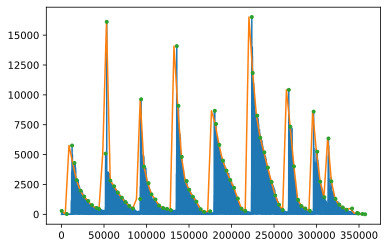

In [29]:
sample_rate, data = scipy.io.wavfile.read('fugue.wav')
data = np.abs(data[:, 0])
c, i = condense(data, 4410)
plt.plot(data)
plt.plot(np.arange(0, len(data), 4410), c)
plt.plot(i, data[i], '.');

`splits()` first picks out peaks from the condensed version of the signal, and then `merge_peaks()` gets rid of peaks that are too close together.

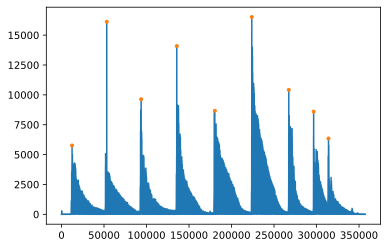

In [30]:
plt.plot(data)
markers = [s for s in merge_peaks(splits(data, condense_window = 4410), merge_window = 8820)]
plt.plot(markers, data[markers], '.');

In [10]:
sample_rate, data = scipy.io.wavfile.read('chi1.wav')
#data = smooth(data[:, 0], smoothness = 1)
data = data[:, 0]
min_gap = 100
prev = -min_gap
fig = plt.figure(figsize = (8, 160))
i = 1
prev_freq = -1
for s in splits(data):
    if s - prev > min_gap:
        ft, freqs = fourier_transform(data[s:s+10000], sample_rate)
        primary_freq = freqs[np.argmax(np.abs(ft))]
        if primary_freq != prev_freq:
            ax = fig.add_subplot(100, 1, i)
            i += 1
            ax.plot(freqs, np.real(ft))
            ax.plot(freqs, np.imag(ft));
            print(s, primary_freq)
            prev_freq = primary_freq
    prev = s

42738 392.49
50841 132.3
53134 141.12
58735 136.71
74971 145.53
79099 295.47
89013 154.35
98357 313.11
98929 154.35
100435 313.11
101199 167.58
101568 163.17000000000002
113681 330.75
114480 167.58
116345 330.75
116467 163.17000000000002
116610 330.75
116738 163.17000000000002
116876 176.4
130677 171.99
133075 176.4
135770 185.22
151840 198.45000000000002
154011 392.49
169877 194.04000000000002
172793 198.45000000000002
173478 211.68
173717 414.54
179524 211.68
188181 220.5
195887 233.73000000000002
207823 701.19
209146 233.73000000000002
209520 216.09
210194 211.68
210383 189.63
211108 238.14000000000001
219085 246.96
229118 524.79
245188 211.68
250119 145.53
250233 211.68
250513 216.09
250615 555.66
252143 277.83
266094 295.47
281221 313.11
297363 330.75
313615 348.39
328652 370.44
344624 392.49
360684 414.54
376938 145.53
377245 441.0
393043 202.86
393270 467.46000000000004
407946 493.92
423362 524.79
431561 149.94
439930 145.53
441930 1111.32
454221 145.53
454516 590.94
460195 264.